                                   # PyCity Schools Analysis

-   The data reveals that, on the whole, smaller populated schools, predominantly Charter Schools, 
    outperformed their larger populated counterparts, which were Public District schools. 
    Although the Charter Schools exhibited superior performance across all categories examined when       compared to the District Public schools, 
    it is important to note that the sample size of the data may not be sufficient to establish a         definitive conclusion regarding their academic superiority.

-   The correlation between school funding and academic performance was found to be inconclusive, as       per the spending summary analysis.  
    Surprisingly,students with lower per student budgets exhibited superior performance compared to       those with larger per student budgets. 
    This finding highlights the need for decision makers to consider not just the amount of funds         allocated to schools, but also how those funds are utilized to achieve desired outcomes. Merely       spending more per student does not guarantee success or excellence. 
    It underscores the importance of prudent budget utilization to optimize educational outcomes.
    
-   Moreover, the analysis of school data indicates that students, on average, are performing             significantly better in Reading as compared to Math. Across all categories, students achieved         higher scores in Reading, suggesting that Math may be perceived as more challenging. 
    This underscores the need for increased emphasis on promoting Math excellence through enhanced         encouragement and additional resources to foster proficiency in this subject area.

In [152]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from pathlib import Path

# File to Load
schools_complete_csv = Path("Resources/schools_complete.csv")
students_complete_csv = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
schools_complete_df = pd.read_csv(schools_complete_csv)
student_complete_df = pd.read_csv(students_complete_csv)

# Combine the data into a single dataset.  
PyCitySchools_df = pd.merge(student_complete_df, schools_complete_df, how="left", on=["school_name", "school_name"])
PyCitySchools_df.head()


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Statistics Summary

In [2]:
# Calculate the total number of unique schools
school_count = PyCitySchools_df['school_name'].nunique()
print("Total number of unique schools: ", school_count)

Total number of unique schools:  15


In [3]:
# Calculate the total number of students
student_count = PyCitySchools_df['student_name'].count()
student_count

39170

In [88]:
# Calculate mean, median, and standard deviation of reading scores.
mean_reading_score = PyCitySchools_df['reading_score'].mean()
median_reading_score = PyCitySchools_df['reading_score'].median()
std_reading_score = PyCitySchools_df['reading_score'].std()

print("Summary Statistics for Reading Scores:")
print("Mean:", mean_reading_score)
print("Median:", median_reading_score)
print("Standard Deviation:", std_reading_score)


Summary Statistics for Reading Scores:
Mean: 81.87784018381414
Median: 82.0
Standard Deviation: 10.239580049916732


A standard deviation of 10.24 means that the reading scores vary by about 10.24 points on average from the mean score of 81.88.

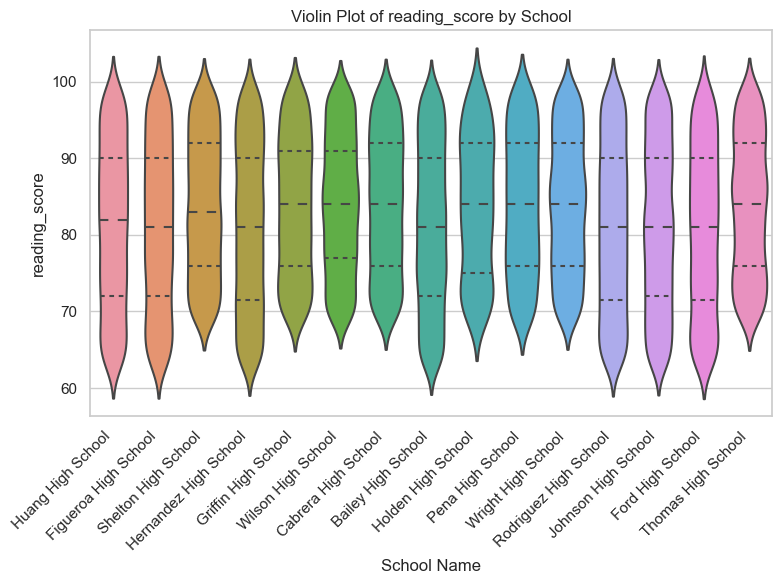

In [143]:
# Create a violin plot to visualize the standard deviation of the "reading_score" column using the Seaborn library.
data_column = "reading_score"

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="school_name", y=data_column, data=PyCitySchools_df, inner="quart")

# Add labels and a title
plt.xlabel('School Name')
plt.ylabel(data_column)
plt.title(f'Violin Plot of {data_column} by School')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

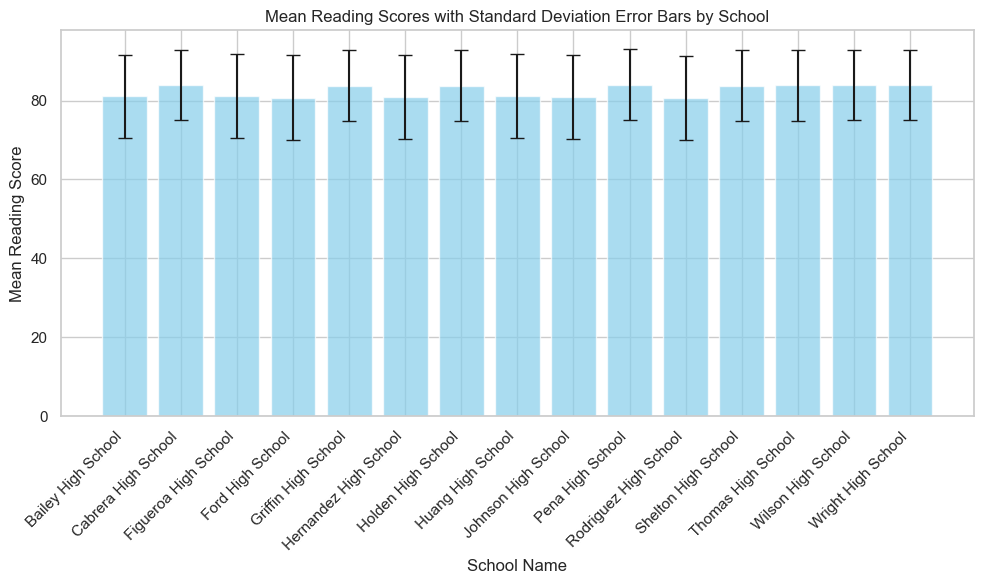

In [141]:
# Mean Reading Scores with Standard Deviation Error Bars by School
data = PyCitySchools_df.groupby("school_name")["reading_score"].mean()  # Calculate the mean reading score per school
std_dev = PyCitySchools_df.groupby("school_name")["reading_score"].std()  # Calculate the standard deviation per school
school_names = data.index

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(school_names, data, yerr=std_dev, capsize=5, color='skyblue', alpha=0.7, align='center')

# Add labels and a title
plt.xlabel('School Name')
plt.ylabel('Mean Reading Score')
plt.title('Mean Reading Scores with Standard Deviation Error Bars by School')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [89]:
# Calculate mean, median, and standard deviation of math scores.
mean_math_score = PyCitySchools_df['math_score'].mean()
median_math_score = PyCitySchools_df['math_score'].median()
std_math_score = PyCitySchools_df['math_score'].std()

print("\nSummary Statistics for Math Scores:")
print("Mean:", mean_math_score)
print("Median:", median_math_score)
print("Standard Deviation:", std_math_score)



Summary Statistics for Math Scores:
Mean: 78.98537145774827
Median: 79.0
Standard Deviation: 12.309967974915544


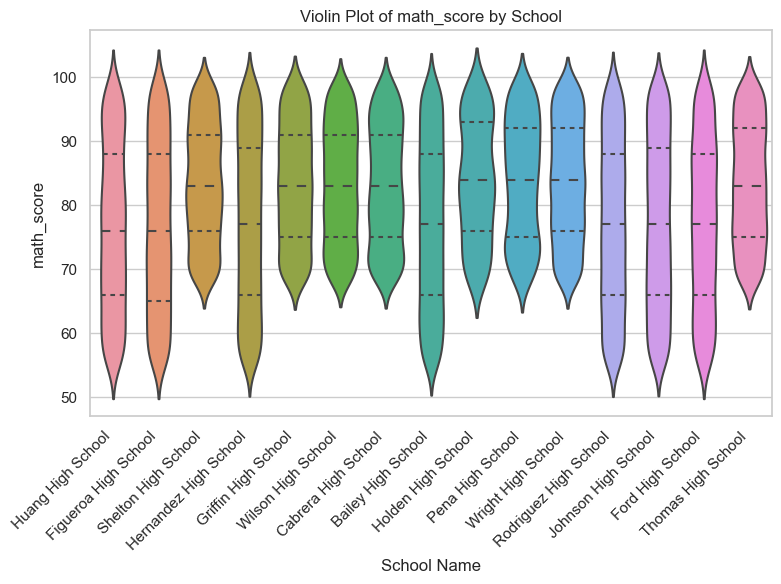

In [144]:
# Create a violin plot to visualize the standard deviation of the "reading_score" column using the Seaborn library.
data_column = "math_score"

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="school_name", y=data_column, data=PyCitySchools_df, inner="quart")

# Add labels and a title
plt.xlabel('School Name')
plt.ylabel(data_column)
plt.title(f'Violin Plot of {data_column} by School')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

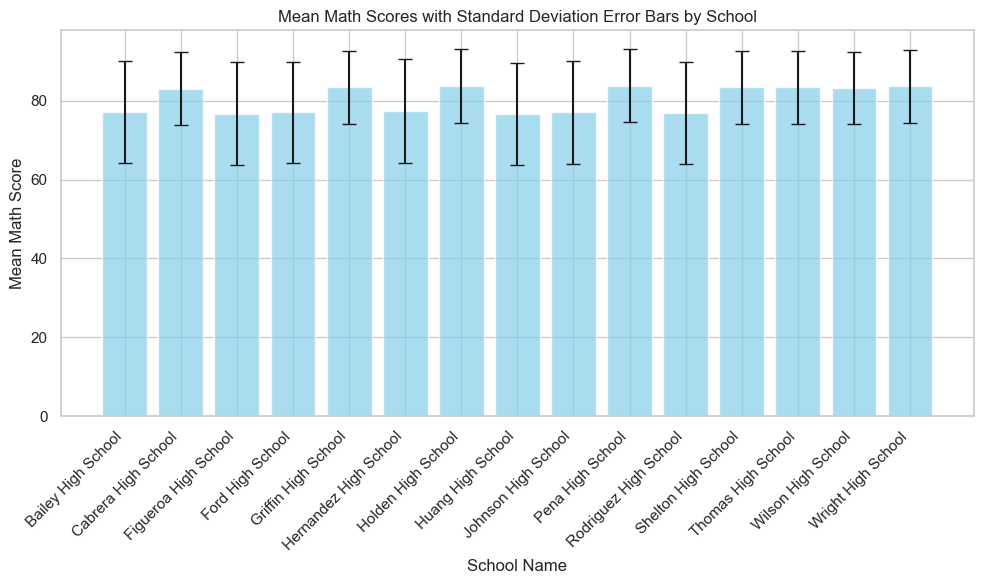

In [146]:
# Mean Math Scores with Standard Deviation Error Bars by School
data = PyCitySchools_df.groupby("school_name")["math_score"].mean()  # Calculate the mean reading score per school
std_dev = PyCitySchools_df.groupby("school_name")["math_score"].std()  # Calculate the standard deviation per school
school_names = data.index

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(school_names, data, yerr=std_dev, capsize=5, color='skyblue', alpha=0.7, align='center')

# Add labels and a title
plt.xlabel('School Name')
plt.ylabel('Mean Math Score')
plt.title('Mean Math Scores with Standard Deviation Error Bars by School') 

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Gender-Based Analyses

In [148]:
# Analyze gender-based differences in student performance (average scores by gender).
gender_avg_scores = PyCitySchools_df.groupby('gender')[['reading_score', 'math_score']].mean()
print("\nGender-Based Average Scores:")
print(gender_avg_scores)


Gender-Based Average Scores:
        reading_score  math_score
gender                           
F           81.996301   79.038865
M           81.757551   78.931052


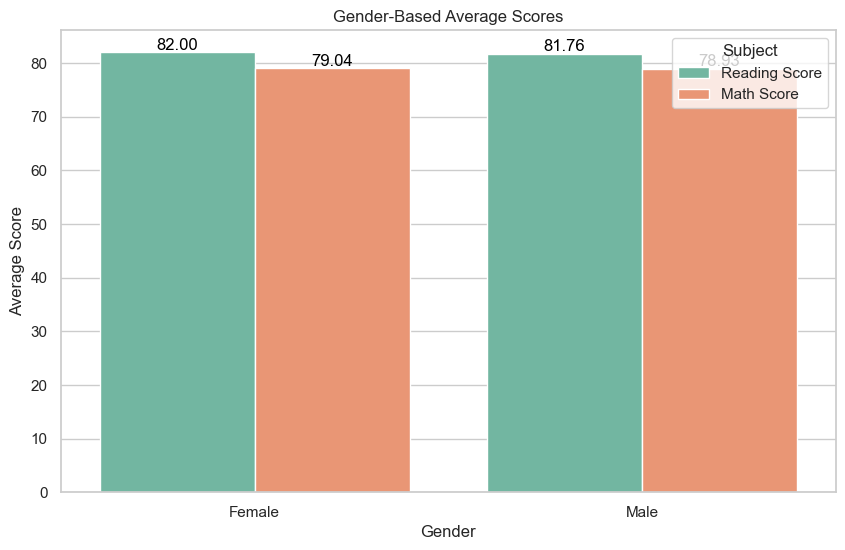

In [149]:
# Create a DataFrame from the given gender-based average scores
gender_avg_scores = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Reading Score': [81.996301, 81.757551],
    'Math Score': [79.038865, 78.931052]
})

# Melt the DataFrame to prepare for plotting
gender_avg_scores_melted = gender_avg_scores.melt(id_vars='Gender', var_name='Subject', value_name='Average Score')

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Gender', y='Average Score', hue='Subject', data=gender_avg_scores_melted, palette='Set2')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Gender-Based Average Scores')

# Add actual figures to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [98]:
# Define a function to calculate pass rate
def pass_rate(scores):
    return (scores >= 70).mean() * 100

# Calculate pass rates by gender
gender_pass_rates = PyCitySchools_df.groupby('gender')[['reading_score', 'math_score']].agg(pass_rate)
print("\nGender-Based Pass Rates:")
print(gender_pass_rates)


Gender-Based Pass Rates:
        reading_score  math_score
gender                           
F           86.313656   75.206486
M           85.289426   74.751737


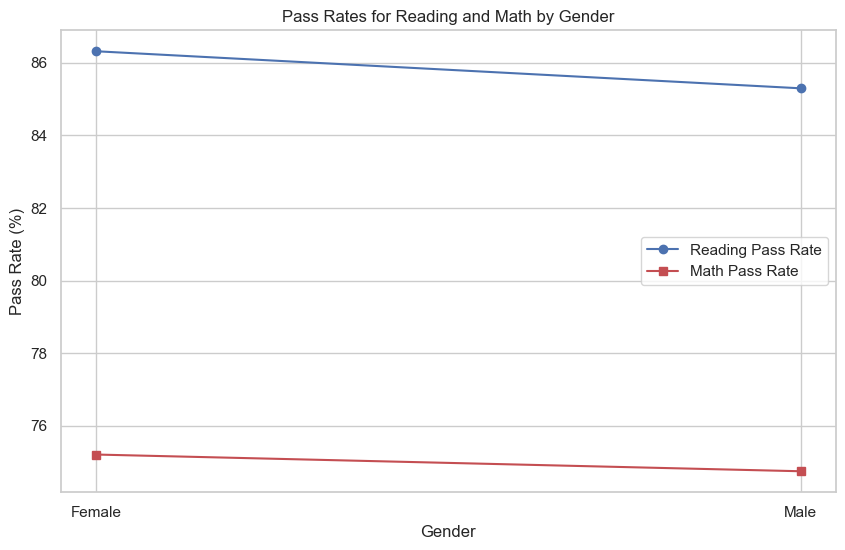

In [156]:
# Visualize Pass Rates for Reading and Math by Gender
data = {
    'Gender': ['Female', 'Male'],
    'Reading Pass Rate': [86.31, 85.29],
    'Math Pass Rate': [75.21, 74.75]
}

df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the first Y-axis for Reading Pass Rate
plt.plot(df['Gender'], df['Reading Pass Rate'], marker='o', color='b', label='Reading Pass Rate')

# Create the second Y-axis for Math Pass Rate
plt.plot(df['Gender'], df['Math Pass Rate'], marker='s', color='r', label='Math Pass Rate')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Pass Rate (%)')
plt.title('Pass Rates for Reading and Math by Gender')

# Add a legend to distinguish between the two lines
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [150]:
# Define a function to compare performance
def better_subject(row):
    if row['reading_score'] > row['math_score']:
        return 'Reading'
    elif row['reading_score'] < row['math_score']:
        return 'Math'
    else:
        return 'Equal'

# Apply the function and calculate percentages, 
# indicating whether a student performs equally well in both subjects, better in math, or better in reading.
PyCitySchools_df['better_subject'] = PyCitySchools_df.apply(better_subject, axis=1)
performance_comparison = PyCitySchools_df.groupby(['gender', 'better_subject'])['Student ID'].count().unstack()

# Calculate percentages
performance_comparison['Total'] = performance_comparison.sum(axis=1)
performance_comparison_percentage = (performance_comparison.divide(performance_comparison['Total'], axis=0) * 100).drop(columns='Total')

print("\nGender-Based Performance Comparison:")
print(performance_comparison_percentage)


Gender-Based Performance Comparison:
better_subject     Equal       Math    Reading
gender                                        
F               2.310616  41.971117  55.718267
M               2.557242  41.775148  55.667610


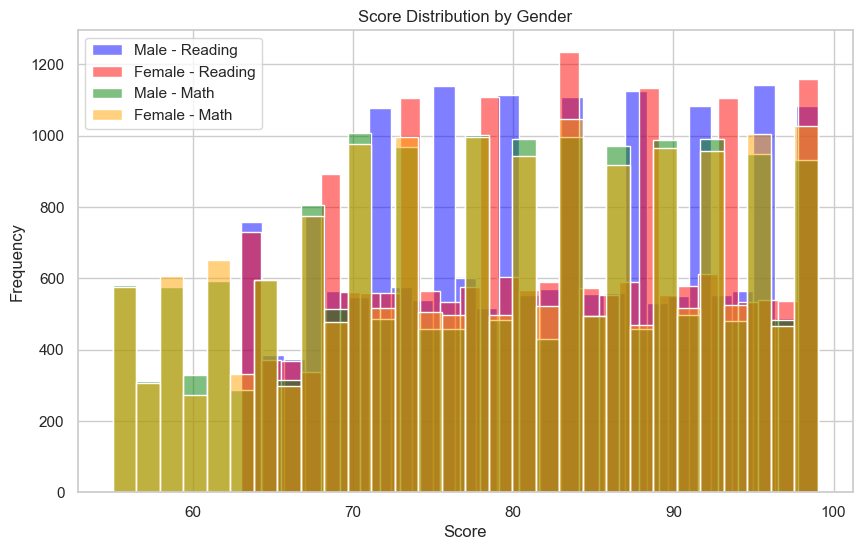

In [157]:
# Visualize Score Distribution by Gender

# Set the style 
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Filter data by gender
male_scores = PyCitySchools_df[PyCitySchools_df['gender'] == 'M']
female_scores = PyCitySchools_df[PyCitySchools_df['gender'] == 'F']

# Plot the histograms
sns.histplot(data=male_scores, x='reading_score', color='blue', alpha=0.5, label='Male - Reading')
sns.histplot(data=female_scores, x='reading_score', color='red', alpha=0.5, label='Female - Reading')

sns.histplot(data=male_scores, x='math_score', color='green', alpha=0.5, label='Male - Math')
sns.histplot(data=female_scores, x='math_score', color='orange', alpha=0.5, label='Female - Math')

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Score Distribution by Gender')

# Show the plot
plt.show()

## School Performance Analyses



In [7]:
# Analyze how student performance varies by grade level (e.g., average scores by grade).
grade_avg_scores = PyCitySchools_df.groupby('grade')[['reading_score', 'math_score']].mean()
print("\nGrade-Level Average Scores:")
print(grade_avg_scores)


Grade-Level Average Scores:
       reading_score  math_score
grade                           
10th       81.874410   78.941483
11th       81.885714   79.083548
12th       81.819851   78.993164
9th        81.914358   78.935659


In [158]:
# Calculate metrics for school performance, using average scores and budget per student, ranking schools accordingly.
school_avg_scores = PyCitySchools_df.groupby('school_name')[['reading_score', 'math_score']].mean()
school_budget_per_student = PyCitySchools_df.groupby('school_name')['budget'].max() / PyCitySchools_df.groupby('school_name')['size'].max()
school_avg_scores['budget_per_student'] = school_budget_per_student
school_avg_scores = school_avg_scores.sort_values(by='reading_score', ascending=False)
print("\nSchool Performance:")
print(school_avg_scores)


School Performance:
                       reading_score  math_score  budget_per_student
school_name                                                         
Pena High School           84.044699   83.839917               609.0
Wilson High School         83.989488   83.274201               578.0
Cabrera High School        83.975780   83.061895               582.0
Wright High School         83.955000   83.682222               583.0
Thomas High School         83.848930   83.418349               638.0
Griffin High School        83.816757   83.351499               625.0
Holden High School         83.814988   83.803279               581.0
Shelton High School        83.725724   83.359455               600.0
Huang High School          81.182722   76.629414               655.0
Figueroa High School       81.158020   76.711767               639.0
Bailey High School         81.033963   77.048432               628.0
Johnson High School        80.966394   77.072464               650.0
Hernandez Hig

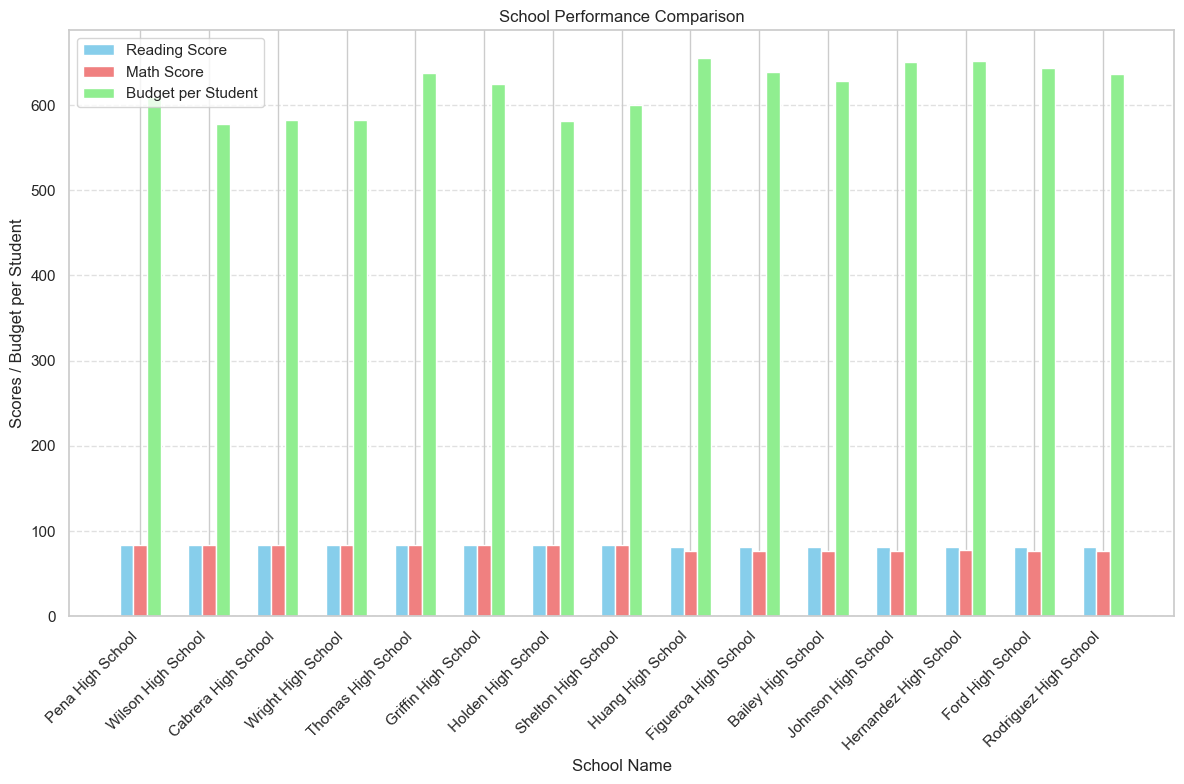

In [159]:
# Visualize school performance comparison

# Extract the data from the DataFrame
school_names = school_avg_scores.index
reading_scores = school_avg_scores['reading_score']
math_scores = school_avg_scores['math_score']
budget_per_student = school_avg_scores['budget_per_student']

# Set the width of each bar
bar_width = 0.2
index = np.arange(len(school_names))

# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Create bars for reading scores, math scores, and budget per student
bar1 = ax.bar(index, reading_scores, bar_width, label='Reading Score', color='skyblue')
bar2 = ax.bar(index + bar_width, math_scores, bar_width, label='Math Score', color='lightcoral')
bar3 = ax.bar(index + 2 * bar_width, budget_per_student, bar_width, label='Budget per Student', color='lightgreen')

# Customize the chart
plt.xlabel('School Name')
plt.ylabel('Scores / Budget per Student')
plt.title('School Performance Comparison')
plt.xticks(index + bar_width, school_names, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the chart
plt.tight_layout()
plt.show()

## School Budget Analysis

In [9]:
# Calculate the total budget
total_budget = PyCitySchools_df['budget'].sum()
total_budget

82932329558

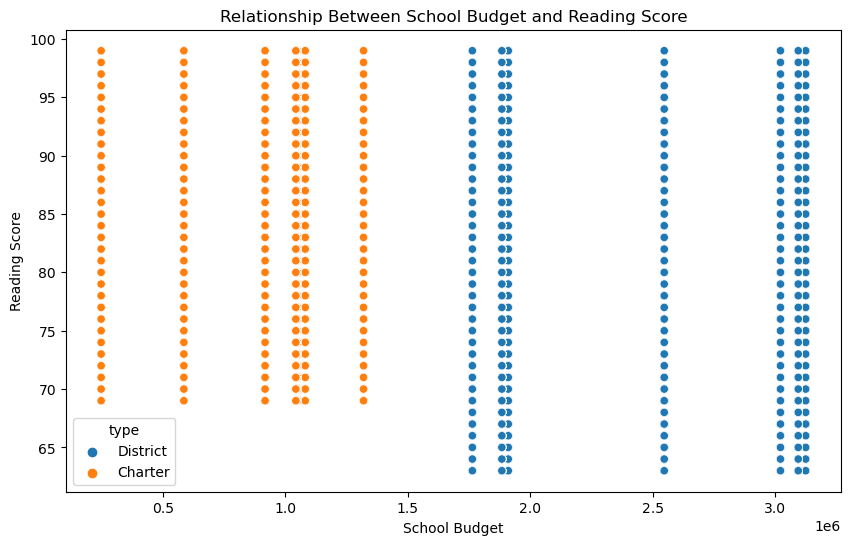

In [10]:
# Explore the relationship between school budget and student performance (Reading)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PyCitySchools_df, x='budget', y='reading_score', hue='type')
plt.xlabel('School Budget')
plt.ylabel('Reading Score')
plt.title('Relationship Between School Budget and Reading Score')
plt.show()

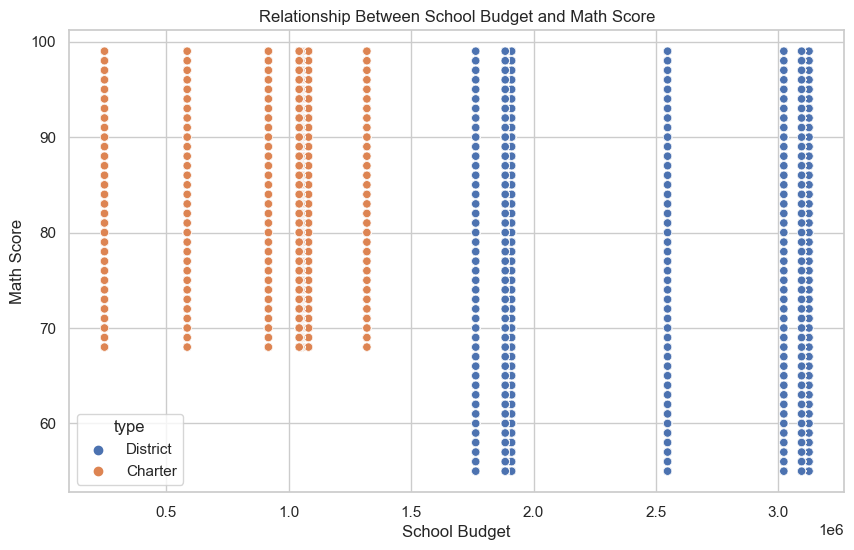

In [161]:
# Explore the relationship between school budget and student performance (Math)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PyCitySchools_df, x='budget', y='math_score', hue='type')
plt.xlabel('School Budget')
plt.ylabel('Math Score')
plt.title('Relationship Between School Budget and Math Score')
plt.show()

## School Type Analysis

In [11]:
# Compare the performance of district schools vs. charter schools.
type_avg_scores = PyCitySchools_df.groupby('type')[['reading_score', 'math_score']].mean()
print("\nAverage Scores by School Type:")
print(type_avg_scores)


Average Scores by School Type:
          reading_score  math_score
type                               
Charter       83.902821   83.406183
District      80.962485   76.987026


In [12]:
# Calculate the average (mean) math score
average_math_score = PyCitySchools_df['math_score'].mean()
average_math_score

78.98537145774827

In [13]:
# Calculate the average (mean) reading score
average_reading_score = PyCitySchools_df['reading_score'].mean()
print(average_reading_score)

81.87784018381414


In [14]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = PyCitySchools_df[(PyCitySchools_df["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
print(passing_math_percentage)

74.9808526933878


In [15]:
# Calculate the percentage of students who passeed reading
passing_reading_count = PyCitySchools_df[(PyCitySchools_df["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
print(passing_reading_percentage)

85.80546336482001


In [16]:
# Calculate the percentage of students that passed math and reading
passing_math_reading_count = PyCitySchools_df[
    (PyCitySchools_df["math_score"] >= 70) & (PyCitySchools_df["reading_score"] >= 70)
].count() ["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [17]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary_df = pd.DataFrame({
    "Total Schools": [school_count],
    "Total Students": [student_count],
    "Total Budget": [total_budget],
    "Average Math Score": [average_math_score],
    "Average Reading Score": [average_reading_score],
    "% Passing Math": [passing_math_percentage],
    "% Passing Reading": [passing_reading_percentage],
    "% Overall Passing": [overall_passing_rate]
                                    
})

# Formatting
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$82,932,329,558.00",78.985371,81.87784,74.980853,85.805463,65.172326


# School Summary

In [18]:
# Select the school type 
school_type = PyCitySchools_df.groupby("school_name")["type"].first()
school_type

school_name
Bailey High School       District
Cabrera High School       Charter
Figueroa High School     District
Ford High School         District
Griffin High School       Charter
Hernandez High School    District
Holden High School        Charter
Huang High School        District
Johnson High School      District
Pena High School          Charter
Rodriguez High School    District
Shelton High School       Charter
Thomas High School        Charter
Wilson High School        Charter
Wright High School        Charter
Name: type, dtype: object

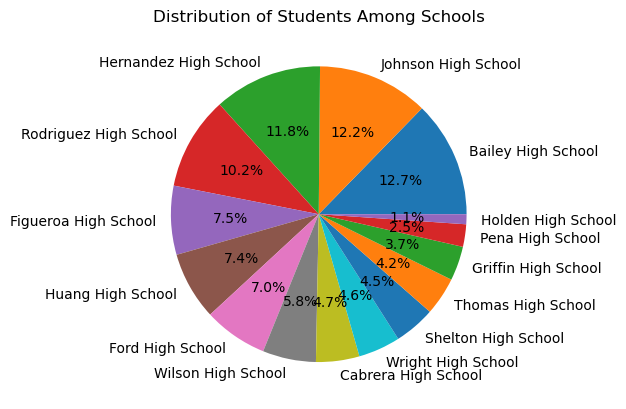

In [19]:
# Pie chart of the distribution of students among schools

school_student_counts = PyCitySchools_df['school_name'].value_counts()
plt.pie(school_student_counts, labels=school_student_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Students Among Schools') 
plt.show()

In [20]:
# Calculate the total student count
per_school_counts = PyCitySchools_df['student_name'].count()
per_school_counts

39170

In [21]:
# Calculate the total per school budget
per_school_budget = PyCitySchools_df.groupby(["school_name"]).mean()["budget"]
per_school_budget


school_name
Bailey High School       3124928.0
Cabrera High School      1081356.0
Figueroa High School     1884411.0
Ford High School         1763916.0
Griffin High School       917500.0
Hernandez High School    3022020.0
Holden High School        248087.0
Huang High School        1910635.0
Johnson High School      3094650.0
Pena High School          585858.0
Rodriguez High School    2547363.0
Shelton High School      1056600.0
Thomas High School       1043130.0
Wilson High School       1319574.0
Wright High School       1049400.0
Name: budget, dtype: float64

In [87]:
# Calculate the total Per student budget
per_school_capita = per_school_budget / per_school_counts

per_school_capita

Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [106]:
# Calculate the average math scores
per_school_math = PyCitySchools_df.groupby(["school_name"]).mean()["math_score"]


In [24]:
# Calculate the average reading scores
per_school_reading = PyCitySchools_df.groupby(["school_name"]).mean()["reading_score"]


In [25]:
# Calculate the number of schools with math scores of 70 or higher
school_passing_math = PyCitySchools_df[(PyCitySchools_df["math_score"] >= 70)]

In [26]:
# Calculate the number of schools with reading scores of 70 or higher
school_passing_reading = PyCitySchools_df[(PyCitySchools_df["reading_score"] >= 70)]


In [27]:
# Calculate the schools that passed both math and reading with scores of 70 or higher
passing_math_and_reading = PyCitySchools_df[
    (PyCitySchools_df["reading_score"] >= 70) & (PyCitySchools_df["math_score"] >= 70)
]
passing_math_and_reading 

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [28]:
# Calculate the passing rates
per_school_type = PyCitySchools_df.groupby("school_name")["type"].first()
per_school_counts = PyCitySchools_df["school_name"].value_counts()
per_school_passing_math = PyCitySchools_df[PyCitySchools_df['math_score'] >= 70].groupby('school_name').count()["student_name"] / per_school_counts * 100
per_school_passing_reading = PyCitySchools_df[PyCitySchools_df['reading_score'] >= 70].groupby('school_name').count()["student_name"] / per_school_counts * 100
overall_passing_rate = PyCitySchools_df[(PyCitySchools_df["reading_score"] >= 70) & (PyCitySchools_df["math_score"] >= 70)].groupby('school_name').count()["student_name"] / per_school_counts * 100

In [107]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.

per_school_summary = pd.DataFrame({

"School Type": per_school_type,
"Total Students": per_school_counts.values,
"Total School Budget": per_school_budget.values,
"Per Student Budget": per_school_capita.values,
"Average Math Score": per_school_math.values,
"Average Reading Score": per_school_reading.values,
"% Passing Math": per_school_passing_math.values,
"% Passing Reading": per_school_passing_reading.values,
"% Overall Passing": overall_passing_rate.values
})


# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,4761,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,4635,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,3999,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,2949,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455


# Highest-Performing Schools (by % Overall Passing)

In [108]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values(by='% Overall Passing', ascending=False)
top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,4761,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1468,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,2949,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,962,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,1800,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


# Bottom Performing Schools (By % Overall Passing)

In [109]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values(by='% Overall Passing', ascending=True)
bottom_schools.head(5)


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,1761,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,4635,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2283,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,2917,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,1858,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


# Math Scores by Grade

In [110]:
# Use the code provided to separate the data by grade
ninth_graders =  PyCitySchools_df[( PyCitySchools_df["grade"] == "9th")]
tenth_graders =  PyCitySchools_df[( PyCitySchools_df["grade"] == "10th")]
eleventh_graders =  PyCitySchools_df[( PyCitySchools_df["grade"] == "11th")]
twelfth_graders =  PyCitySchools_df[( PyCitySchools_df["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "9th")].groupby('school_name').mean()
tenth_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "10th")].groupby('school_name').mean()
eleventh_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "11th")].groupby('school_name').mean()
twelfth_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "12th")].groupby('school_name').mean()

# Use the code to select only the `math_score`.
ninth_grade_math_scores = ninth_graders_scores["math_score"]
tenth_grader_math_scores = tenth_graders_scores["math_score"]
eleventh_grader_math_scores = eleventh_graders_scores["math_score"]
twelfth_grader_math_scores = twelfth_graders_scores["math_score"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = math_scores_by_grade = pd.DataFrame({
    "9th": ninth_graders_scores["math_score"],
    "10th": tenth_graders_scores["math_score"],
    "11th": eleventh_graders_scores["math_score"],
    "12th": twelfth_graders_scores["math_score"]
})

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


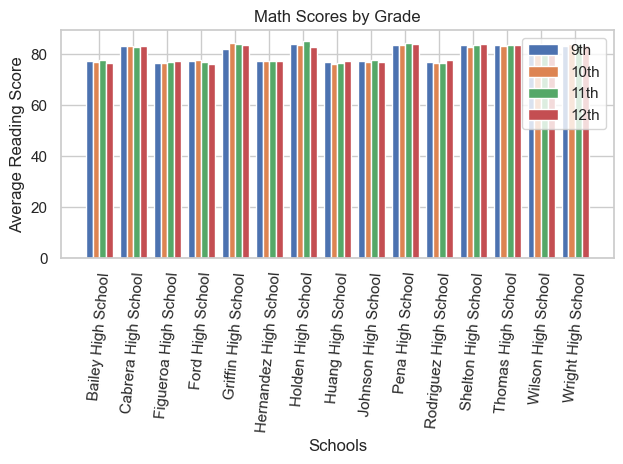

In [111]:
# Set the x-axis labels to the grade levels
x_labels = reading_scores_by_grade.index

# Set the y-axis data for each grade
ninth_grade_scores = math_scores_by_grade["9th"]
tenth_grade_scores = math_scores_by_grade["10th"]
eleventh_grade_scores = math_scores_by_grade["11th"]
twelfth_grade_scores = math_scores_by_grade["12th"]

# Set the width of the bars
bar_width = 0.2

# Set the positions for the bars on the x-axis
x = range(len(x_labels))

# Create subplots
fig, ax = plt.subplots()

# Create bars for each grade and position them
plt.bar(x, ninth_grade_scores, width=bar_width, label="9th", align='center')
plt.bar([i + bar_width for i in x], tenth_grade_scores, width=bar_width, label="10th", align='center')
plt.bar([i + 2*bar_width for i in x], eleventh_grade_scores, width=bar_width, label="11th", align='center')
plt.bar([i + 3*bar_width for i in x], twelfth_grade_scores, width=bar_width, label="12th", align='center')

# Set the x-axis labels
ax.set_xticks([i + 1.5*bar_width for i in x])
ax.set_xticklabels(x_labels, rotation=85)

# Set the chart title and labels
plt.title('Math Scores by Grade')
plt.xlabel('Schools')
plt.ylabel('Average Reading Score') 

# Add a legend
plt.legend(["9th", "10th", "11th", "12th"], loc='best')

# Show the chart
plt.tight_layout()
plt.show()

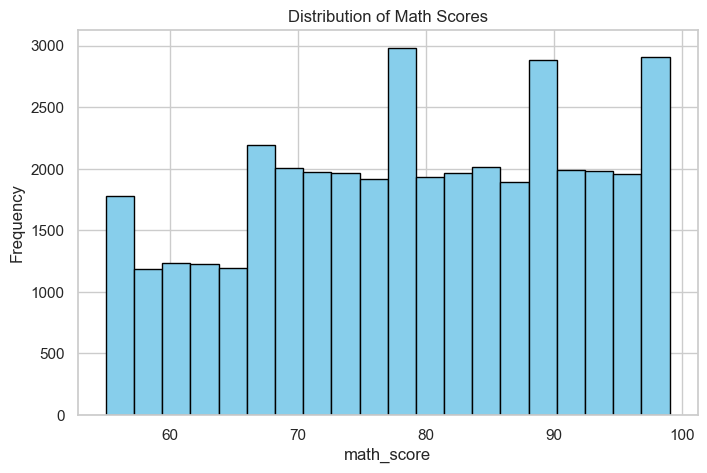

In [112]:
# Histogram of math scores to see how data points are distributed relative to the mean. 
plt.figure(figsize=(8, 5))
plt.hist(PyCitySchools_df['math_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('math_score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')
plt.show() 

# Reading Score by Grade

In [113]:
# Separate the data by grade
ninth_graders = PyCitySchools_df[( PyCitySchools_df["grade"] == "9th")]
tenth_graders = PyCitySchools_df[( PyCitySchools_df["grade"] == "10th")]
eleventh_graders = PyCitySchools_df[( PyCitySchools_df["grade"] == "11th")]
twelfth_graders = PyCitySchools_df[( PyCitySchools_df["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "9th")].groupby('school_name').mean()
tenth_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "10th")].groupby('school_name').mean()
eleventh_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "11th")].groupby('school_name').mean()
twelfth_graders_scores = PyCitySchools_df[( PyCitySchools_df["grade"] == "12th")].groupby('school_name').mean()

# Select only the `reading_score`.
ninth_grade_reading_scores = ninth_graders_scores["reading_score"]
tenth_grader_reading_scores = tenth_graders_scores["reading_score"]
eleventh_grader_reading_scores = eleventh_graders_scores["reading_score"]
twelfth_grader_reading_scores = twelfth_graders_scores["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({
    "9th": ninth_graders_scores["reading_score"],
    "10th": tenth_graders_scores["reading_score"],
    "11th": eleventh_graders_scores["reading_score"],
    "12th": twelfth_graders_scores["reading_score"]
})


# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


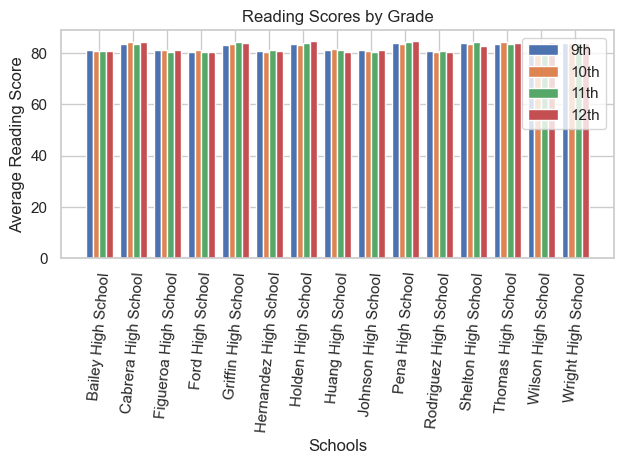

In [114]:
# Set the x-axis labels to the grade levels
x_labels = reading_scores_by_grade.index

# Set the y-axis data for each grade
ninth_grade_scores = reading_scores_by_grade["9th"]
tenth_grade_scores = reading_scores_by_grade["10th"]
eleventh_grade_scores = reading_scores_by_grade["11th"]
twelfth_grade_scores = reading_scores_by_grade["12th"]

# Set the width of the bars
bar_width = 0.2

# Set the positions for the bars on the x-axis
x = range(len(x_labels))

# Create subplots
fig, ax = plt.subplots()

# Create bars for each grade and position them
plt.bar(x, ninth_grade_scores, width=bar_width, label="9th", align='center')
plt.bar([i + bar_width for i in x], tenth_grade_scores, width=bar_width, label="10th", align='center')
plt.bar([i + 2*bar_width for i in x], eleventh_grade_scores, width=bar_width, label="11th", align='center')
plt.bar([i + 3*bar_width for i in x], twelfth_grade_scores, width=bar_width, label="12th", align='center')

# Set the x-axis labels
ax.set_xticks([i + 1.5*bar_width for i in x])
ax.set_xticklabels(x_labels, rotation=85)

# Set the chart title and labels
plt.title('Reading Scores by Grade')
plt.xlabel('Schools')
plt.ylabel('Average Reading Score')

# Add a legend
plt.legend(["9th", "10th", "11th", "12th"], loc='best')

# Show the chart
plt.tight_layout()
plt.show()

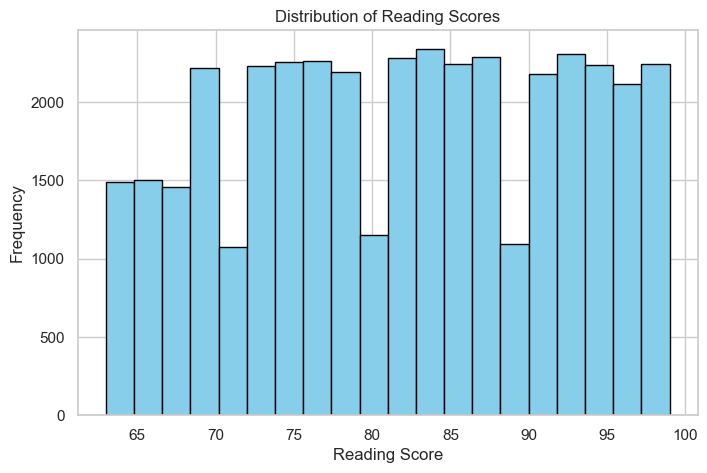

In [115]:
# Histogram of reading scores to see how data points are distributed relative to the mean. 
plt.figure(figsize=(8, 5))
plt.hist(PyCitySchools_df['reading_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Scores')
plt.show()

# School Spending vs Student Performance Analysis

In [122]:
# Create a copy of the school summary with the "Per Student Budget" 
school_spending_df = per_school_summary.copy()
school_spending_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,4761,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,4635,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,3999,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,2949,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,2917,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,2739,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2283,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,1858,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


In [136]:
# Create the bins and labels
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

# Categorize spending based on the bins using pd.cut
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=labels)
school_spending_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,4761,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,4635,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,3999,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,2949,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,2917,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,2739,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2283,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,1858,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


In [134]:

# Calculate mean scores per spending range
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

# Create the spending summary DataFrame
spending_summary = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "% Passing Math": spending_passing_math,
    "% Passing Reading": spending_passing_reading,
    "% Overall Passing": overall_passing_spending
})

# Display the spending summary table
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


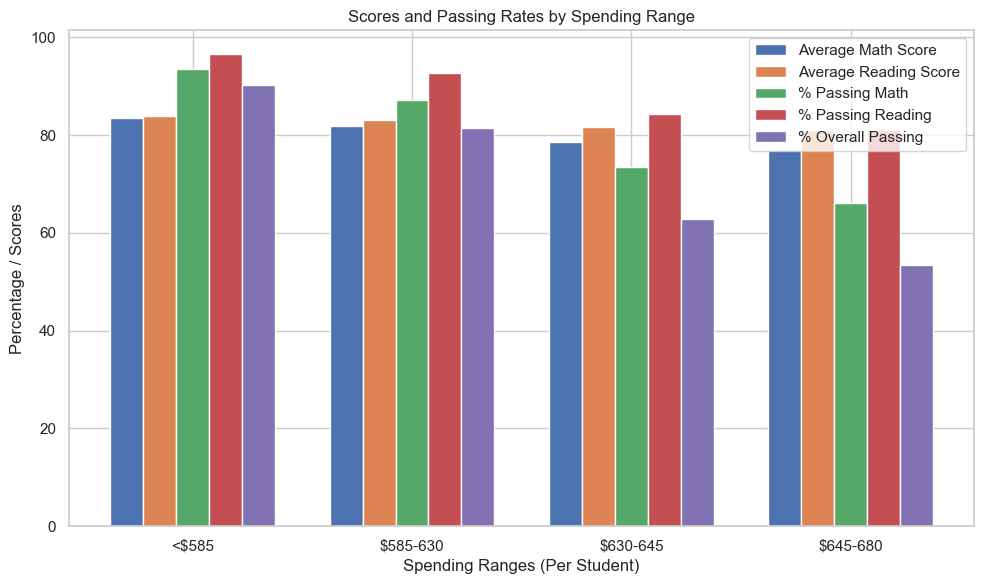

In [137]:
# Extract the data from the spending_summary DataFrame
spending_ranges = spending_summary.index
average_math_scores = spending_summary["Average Math Score"]
average_reading_scores = spending_summary["Average Reading Score"]
passing_math_percentage = spending_summary["% Passing Math"]
passing_reading_percentage = spending_summary["% Passing Reading"]
overall_passing_percentage = spending_summary["% Overall Passing"]

# Create subplots with multiple bar plots
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.15

# Create x-axis positions for each spending range
x = range(len(spending_ranges))

# Plot each data series
ax.bar(x, average_math_scores, width=bar_width, label='Average Math Score')
ax.bar([i + bar_width for i in x], average_reading_scores, width=bar_width, label='Average Reading Score')
ax.bar([i + 2*bar_width for i in x], passing_math_percentage, width=bar_width, label='% Passing Math')
ax.bar([i + 3*bar_width for i in x], passing_reading_percentage, width=bar_width, label='% Passing Reading')
ax.bar([i + 4*bar_width for i in x], overall_passing_percentage, width=bar_width, label='% Overall Passing')

# Set the x-axis labels and ticks
ax.set_xlabel('Spending Ranges (Per Student)')
ax.set_xticks([i + 2*bar_width for i in x])
ax.set_xticklabels(spending_ranges)

# Set the y-axis label
ax.set_ylabel('Percentage / Scores')

# Set the plot title
ax.set_title('Scores and Passing Rates by Spending Range')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# School Size Analysis 

In [37]:
# Bin school size into small, medium and large.
# Define size bins and labels
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

# Use pd.cut to create a new column "School Size" based on "Total Students" column
per_school_summary['School Size'] = pd.cut(per_school_summary['Total Students'], bins=size_bins, labels=labels)

# Groupby "School Size" and calculate mean for relevant columns
size_summary = per_school_summary.groupby('School Size').mean()

# Drop unnecessary columns
size_summary = size_summary[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', "% Overall Passing"]]

# Print size_summary
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.478211,83.972244,93.600526,96.575376,90.457950
Medium (1000-2000),80.906579,82.666086,82.831606,90.110386,75.581616
Large (2000-5000),79.374829,82.082863,76.680841,86.822833,67.542428


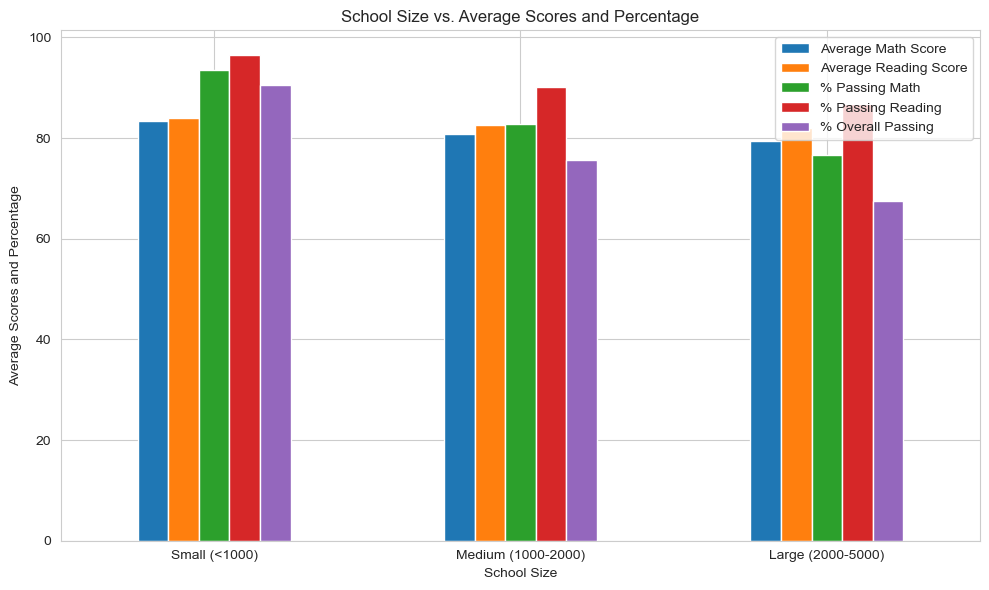

In [56]:
# Create a bar chart of size summary
size_summary.plot(kind='bar', figsize=(10, 6))

# Add labels and a title 
plt.xlabel('School Size')
plt.ylabel('Average Scores and Percentage')
plt.title('School Size vs. Average Scores and Percentage')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit in the figure
plt.show()

#  School Type Analysis: 

In [52]:
# Group per_school_summary by "School Type"
type_summary = per_school_summary.groupby("School Type").mean()

# Display the type_summary DataFrame
type_summary

,Total Students,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,,
Charter,2092.625000,83.473852,83.896421,93.620830,96.586489,90.432244
District,3204.142857,76.956733,80.966636,66.548453,80.799062,53.672208


In [54]:
# Compare the performance of district schools vs. charter schools.
type_avg_scores = PyCitySchools_df.groupby('type')[['reading_score', 'math_score']].mean()
print("\nAverage Scores by School Type:")
print(type_avg_scores)


Average Scores by School Type:
          reading_score  math_score
type                               
Charter       83.902821   83.406183
District      80.962485   76.987026


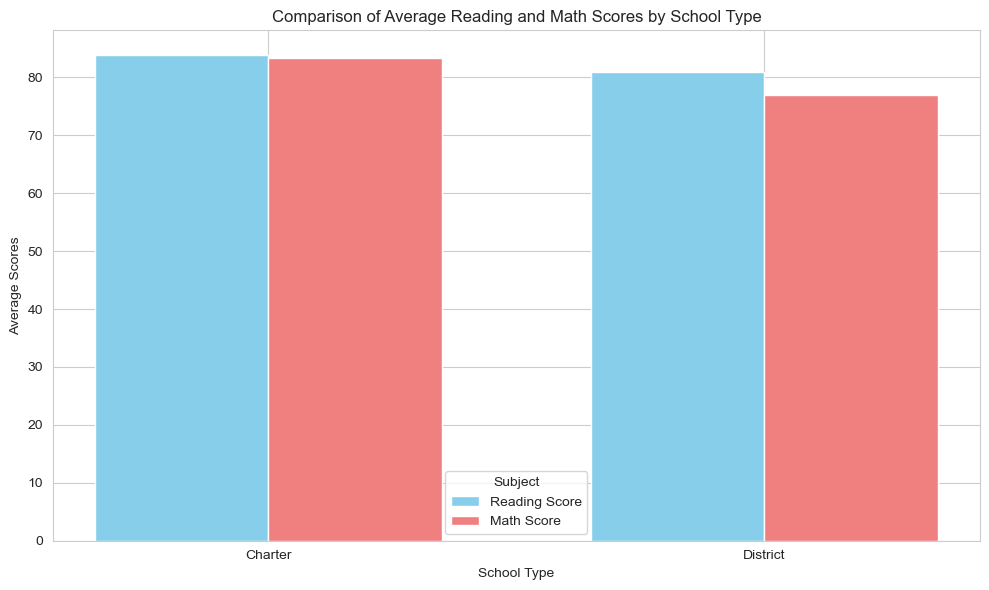

In [41]:
# Visualize with a grouped bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set the style for the plot

# Define the bar width for better separation
bar_width = 0.35

# Calculate the positions for the bars
x = range(len(type_avg_scores.index))

# Plot Reading Score
plt.bar(x, type_avg_scores['reading_score'], width=bar_width, label="Reading Score", color="skyblue")

# Plot Math Score
plt.bar([i + bar_width for i in x], type_avg_scores['math_score'], width=bar_width, label="Math Score", color="lightcoral")

# Set x-axis labels
plt.xticks([i + bar_width / 2 for i in x], type_avg_scores.index)

# Add labels and a title
plt.xlabel('School Type')
plt.ylabel('Average Scores')
plt.title('Comparison of Average Reading and Math Scores by School Type')
plt.legend(title="Subject")

# Display the plot
plt.xticks(rotation=0)  # Ensure school types are not rotated
plt.tight_layout()  # Ensure all elements fit in the figure
plt.show()

# Correlation Analysis:

In [55]:
# Analyzing correlations between variables.
correlation_matrix = PyCitySchools_df.corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Student ID,reading_score,math_score,School ID,size,budget
Student ID,1.000000,-0.007718,0.004321,0.992448,0.104014,0.102474
reading_score,-0.007718,1.000000,0.030435,-0.007616,-0.109405,-0.112019
math_score,0.004321,0.030435,1.000000,0.005421,-0.194434,-0.198942
School ID,0.992448,-0.007616,0.005421,1.000000,0.095936,0.093816
size,0.104014,-0.109405,-0.194434,0.095936,1.000000,0.998169
budget,0.102474,-0.112019,-0.198942,0.093816,0.998169,1.000000


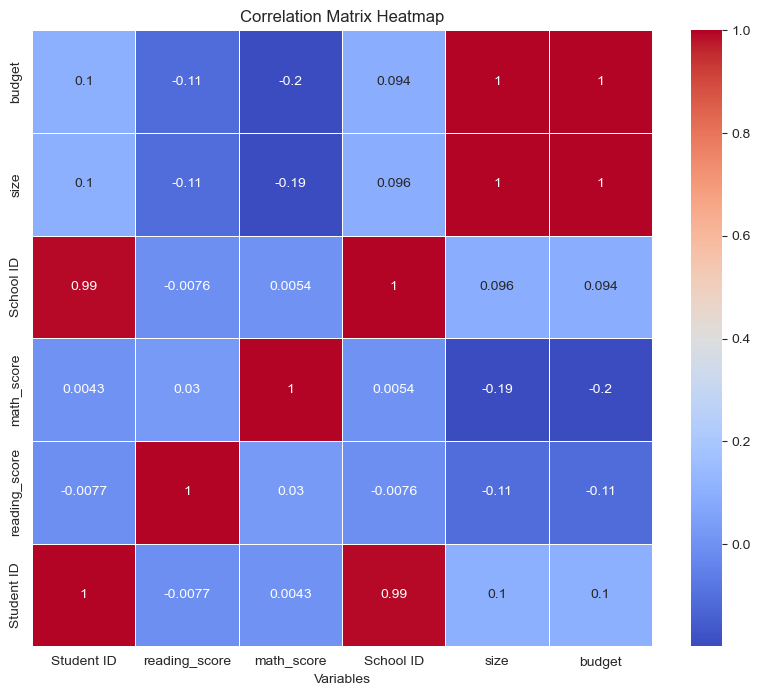

In [51]:
# Define the correlation matrix
correlation_matrix = PyCitySchools_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

# Set plot labels and title
plt.xlabel('Variables')
plt.title('Correlation Matrix Heatmap')
# plt.ylabel('Variables')
# Reverse the y-axis labels to appear at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

## Interpretation of the correlations in the above heatmap:

#### Student ID vs. Other Variables:

   * Student ID has a perfect positive correlation of 1 with itself, which is expected since it's the same variable.
   * Student ID has very weak correlations (close to 0) with all other variables (reading_score, math_score, School ID, size,  
      and budget). This suggests that there is little to no linear relationship between Student ID and the other variables.

#### Reading Score vs. Other Variables:

   * Reading Score has a perfect positive correlation of 1 with itself.
   * Reading Score has a very weak negative correlation with Student ID (-0.007718), indicating that there's almost no linear  
      relationship between Student ID and Reading Score.
   * Reading Score has a weak positive correlation with Math Score (0.030435), suggesting that students who perform well in 
      reading tend to perform slightly better in math.
   * Reading Score has a very weak negative correlation with School ID (-0.007616), indicating that the specific school's ID 
      doesn't have much impact on reading scores.
   * Reading Score has a moderate negative correlation with Size (-0.109405), implying that as the school size increases, 
      reading scores tend to decrease slightly. This suggests that smaller schools might have slightly higher reading scores on 
      average.
   * Reading Score has a moderate negative correlation with Budget (-0.112019), indicating that as the budget increases, 
      reading scores tend to decrease slightly. This might be a surprising finding, as one might expect higher budgets to lead 
      to better performance, but other factors may be at play.

#### Math Score vs. Other Variables:

   * Math Score has a perfect positive correlation of 1 with itself.
   * Math Score has a very weak positive correlation with Student ID (0.004321), indicating little linear relationship.
   * Math Score has a weak positive correlation with Reading Score (0.030435), suggesting a positive connection between 
      performance in math and reading.
   * Math Score has a very weak positive correlation with School ID (0.005421), implying that the school's ID doesn't strongly 
      influence math scores.
   * Math Score has a moderate negative correlation with Size (-0.194434), indicating that as the school size increases, math 
      scores tend to decrease. This suggests that smaller schools might have slightly higher math scores on average.
   * Math Score has a moderate negative correlation with Budget (-0.198942), similar to reading scores, indicating that as the 
      budget increases, math scores tend to decrease.

#### School ID vs. Other Variables:

   * School ID has a very strong positive correlation with Student ID (0.992448), suggesting that specific schools are 
      associated with specific groups of students.
   * School ID has very weak correlations (close to 0) with other variables (reading_score, math_score, size, and budget), 
      implying that the school's ID doesn't strongly impact these variables.

#### Size vs. Other Variables:

   * Size has a moderate positive correlation with School ID (0.095936), suggesting that larger schools might have higher  
      School ID values.
   * Size has a strong positive correlation with Budget (0.998169), indicating a very strong linear relationship between school 
      size and budget. This means that as the school size increases, the budget also increases significantly.
   * Size has a moderate negative correlation with both Reading Score (-0.109405) and Math Score (-0.194434), suggesting that 
      as school size increases, student performance in both reading and math tends to decrease slightly.

#### Budget vs. Other Variables:

   * Budget has a strong positive correlation with Size (0.998169), indicating a very strong linear relationship between school 
      budget and size. Larger schools tend to have larger budgets.
   * Budget has moderate negative correlations with both Reading Score (-0.112019) and Math Score (-0.198942), similar to 
      school size. This implies that as the budget increases, student performance in both reading and math tends to decrease 
      slightly.
